#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8603 sha256=a25d58a7e7ec91e8bbb10e6c1056a43d6dc772e8d0474b125c73195c46c35574
  Stored in directory: c:\users\sri\appdata\local\pip\cache\wheels\b2\b8\f9\08876fa31be00070d6a60686b9842e044d1a9b471e8d6772d4
Successfully built MiniSom


## Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


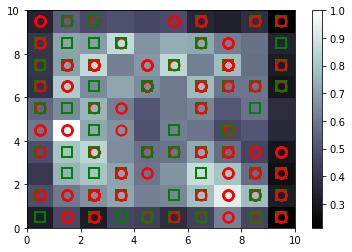

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [7]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [8]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15805212
15748499
15770406
15781975
15744423
15785705


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [9]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [10]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [12]:
import tensorflow as tf
tf.__version__

'2.7.0'

## Initializing the ANN

In [13]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [15]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [16]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [17]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 944us/step - loss: 0.4580 - accuracy: 0.8464
Epoch 2/10
690/690 [==============================] - 1s 964us/step - loss: 0.2322 - accuracy: 0.9797
Epoch 3/10
690/690 [==============================] - 1s 915us/step - loss: 0.1446 - accuracy: 0.9899
Epoch 4/10
690/690 [==============================] - 1s 904us/step - loss: 0.0979 - accuracy: 0.9899
Epoch 5/10
690/690 [==============================] - 1s 905us/step - loss: 0.0715 - accuracy: 0.9913
Epoch 6/10
690/690 [==============================] - 1s 896us/step - loss: 0.0570 - accuracy: 0.9913
Epoch 7/10
690/690 [==============================] - 1s 904us/step - loss: 0.0487 - accuracy: 0.9913
Epoch 8/10
690/690 [==============================] - 1s 953us/step - loss: 0.0413 - accuracy: 0.9913
Epoch 9/10
690/690 [==============================] - 1s 932us/step - loss: 0.0383 - accuracy: 0.9913
Epoch 10/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0364 

## Predicting test set results

In [18]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [19]:
print(y_pred)

[[1.56465940e+07 5.60441913e-06]
 [1.56650870e+07 6.79794312e-06]
 [1.57611580e+07 7.18027786e-06]
 ...
 [1.55752430e+07 1.26453131e-01]
 [1.55988020e+07 1.26453131e-01]
 [1.57901130e+07 1.52985454e-01]]
